In [0]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from numpy import cov

## 1. Contraceptive Prevalence Dataset

### 1.1 Load data

In [0]:
CP = pd.read_csv('CP.csv',sep = ',', header = 0)

In [0]:
CP.head()

In [0]:
print('The number of rows: '+ str(CP.shape[0]))

The number of rows: 264


In [0]:
print('The number of columns: '+ str(CP.shape[1]))

The number of columns: 64


### 1.2 Data exploration 

In [0]:
CP.set_index('Country Name',inplace = True) # set the index of dataframe to 'Counrty Name'

In [0]:
CP.head()

In [0]:
tctry_CP = CP.drop(['Country Code','Indicator Name','Indicator Code','2018','2019'], axis = 1).loc[['China','India',
'United States']]

In [0]:
tctry_CP

In [0]:
print(tctry_CP.isnull().sum(axis = 1))

Country Name
China            40
India            44
United States    40
dtype: int64


For each country, among 58 years, over 39 years has missing value. 

In [0]:
tctry_CP.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
China,18.0,84.550000,6.568217,69.5,83.800,85.75,89.075000,91.099998
India,14.0,43.107143,14.289935,13.6,36.650,47.55,53.375000,56.300000
United States,18.0,72.974303,3.670510,66.5,69.875,73.45,76.284295,79.000000


### 1.3 Dealing with missing values

In [0]:
tctry_CP.loc['China'] = tctry_CP.loc['China'].interpolate().fillna(method = 'bfill')

In [0]:
tctry_CP.loc['India'] = tctry_CP.loc['India'].interpolate().fillna(method = 'bfill')

In [0]:
tctry_CP.loc['United States'] = tctry_CP.loc['United States'].interpolate().fillna(method = 'bfill')

In [0]:
tctry_CP

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,69.5,69.5,69.5,69.5,69.5,69.5,69.50,69.50,69.50,69.50,...,89.3,89.0000,89.100,88.6000,87.90,87.2200,86.54000,85.8600,85.180000,84.500000
India,13.6,13.6,13.6,13.6,13.6,13.6,13.60,13.60,13.60,13.60,...,54.8,54.6375,54.475,54.3125,54.15,53.9875,53.82500,53.6625,53.500000,53.500000
United States,66.5,66.5,66.5,66.5,66.5,66.5,66.72,66.94,67.16,67.38,...,76.4,76.4000,76.400,75.2500,74.10,74.1000,72.70028,72.7000,75.937181,75.937181


In [0]:
CN_CP = tctry_CP.loc['China']

In [0]:
IND_CP = tctry_CP.loc['India']

In [0]:
US_CP = tctry_CP.loc['United States']

In [0]:
CN_CP.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

Text(0.5,1,'Contraceptive Prevalence in China, India and USA from 1960 to 2017')

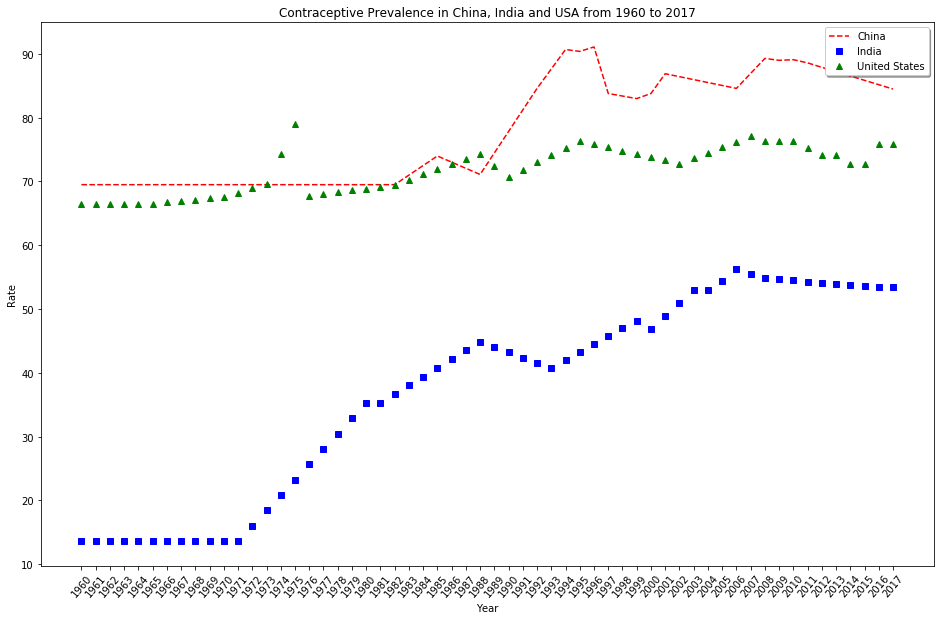

In [0]:
plt.figure(figsize=(16,10)) 
plt.plot(CN_CP.index, CN_CP.values, 'r--', IND_CP.index, IND_CP.values, 'bs',
        US_CP.index, US_CP.values, 'g^')
plt.legend(('China', 'India', 'United States'),loc='upper right', shadow=True)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Contraceptive Prevalence in China, India and USA from 1960 to 2017')

## 2. Mortality Rate Dataset

### 2.1 Load data

In [0]:
MR = pd.read_csv('MR.csv', sep = ',', header = 0)

In [0]:
MR.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,236.5,232.6,228.9,225.1,221.4,...,64.3,61.9,59.5,57.3,55.1,53.1,51.2,49.5,47.9,NaN
2,Angola,AGO,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,71.5,67.3,63.6,60.5,57.8,55.5,53.4,51.6,NaN
3,Albania,ALB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.9,11.0,10.2,9.5,8.9,8.5,8.2,8.0,7.8,NaN
4,Andorra,AND,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.7,3.6,3.4,3.2,3.1,3.0,2.8,2.7,NaN


In [0]:
print('The number of rows: '+ str(MR.shape[0]))

The number of rows: 264


In [0]:
print('The number of columns: '+ str(MR.shape[1]))

The number of columns: 64


### 2.2 Data exploration

In [0]:
MR.set_index('Country Name',inplace = True) # set the index of dataframe to 'Counrty Name'

In [0]:
MR.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,236.5,232.6,228.9,225.1,221.4,217.7,...,64.3,61.9,59.5,57.3,55.1,53.1,51.2,49.5,47.9,NaN
Angola,AGO,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,71.5,67.3,63.6,60.5,57.8,55.5,53.4,51.6,NaN
Albania,ALB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.9,11.0,10.2,9.5,8.9,8.5,8.2,8.0,7.8,NaN
Andorra,AND,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.7,3.6,3.4,3.2,3.1,3.0,2.8,2.7,NaN


In [0]:
tctry_MR = MR.drop(['Country Code','Indicator Name','Indicator Code','2018','2019'], axis = 1).loc[['China','India',
'United States']]

In [0]:
tctry_MR

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.7,...,15.8,14.6,13.6,12.6,11.6,10.8,10.0,9.2,8.5,7.9
India,161.4,159.1,156.9,154.9,153.1,151.3,149.6,148.0,146.4,144.7,...,49.4,47.3,45.1,43.0,40.9,38.9,36.9,35.0,33.2,31.5
United States,25.9,25.4,24.9,24.4,23.8,23.3,22.7,22.0,21.3,20.6,...,6.5,6.4,6.2,6.1,6.0,6.0,5.9,5.8,5.8,5.7


In [0]:
print(tctry_MR.isnull().sum(axis = 1))

Country Name
China            9
India            0
United States    0
dtype: int64


Among three countries, only China has 9 missing values

In [0]:
tctry_MR.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
China,49.0,37.636735,20.132868,7.9,20.30,40.10,46.2,83.7
India,58.0,95.301724,40.313919,31.5,60.45,92.15,133.3,161.4
United States,58.0,12.144828,6.375038,5.7,6.90,9.80,16.5,25.9


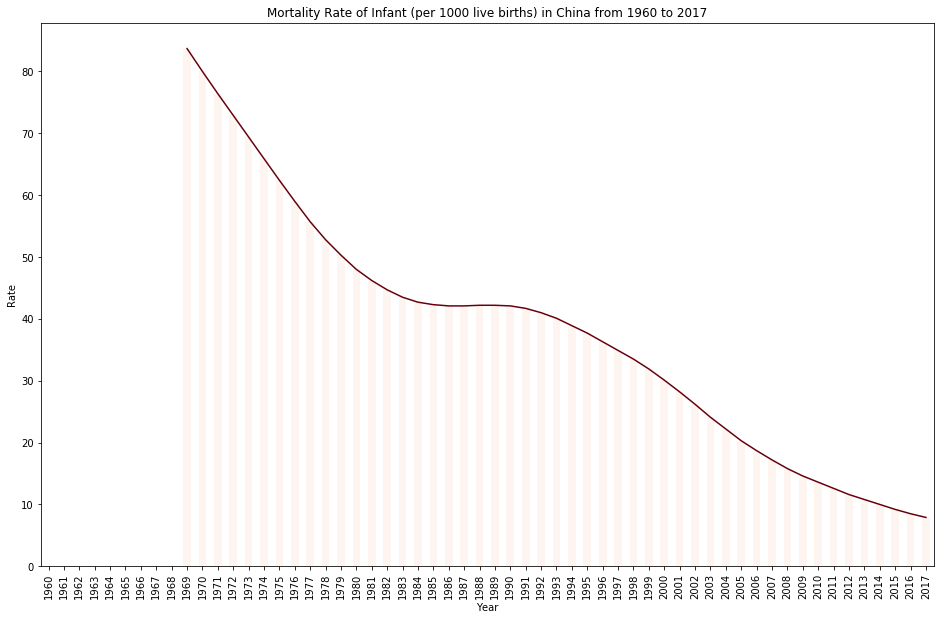

In [0]:
CN_MR = tctry_MR.xs('China')
CN_MR_plot = CN_MR.plot(kind = 'line',colormap='Reds_r',figsize = (16,10),
title = 'Mortality Rate of Infant (per 1000 live births) in China from 1960 to 2017')
CN_MR_plot.set_xlabel("Year")
CN_MR_plot.set_ylabel("Rate")
CN_MR_plot2 = CN_MR.plot(kind = 'bar',colormap='Reds')

There are missing values for China from 1960 to 1968

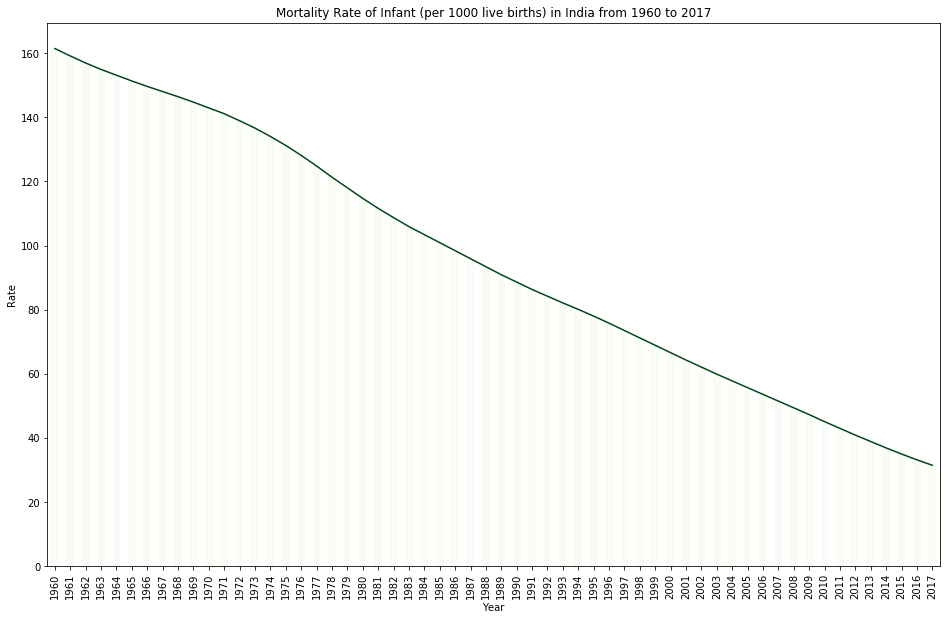

In [0]:
IND_MR = tctry_MR.xs('India')
IND_MR_plot = IND_MR.plot(kind = 'line',colormap='Greens_r',figsize = (16,10),
title = 'Mortality Rate of Infant (per 1000 live births) in India from 1960 to 2017')
IND_MR_plot.set_xlabel("Year")
IND_MR_plot.set_ylabel("Rate")
IND_MR_plot2 = IND_MR.plot(kind = 'bar',colormap='Greens')

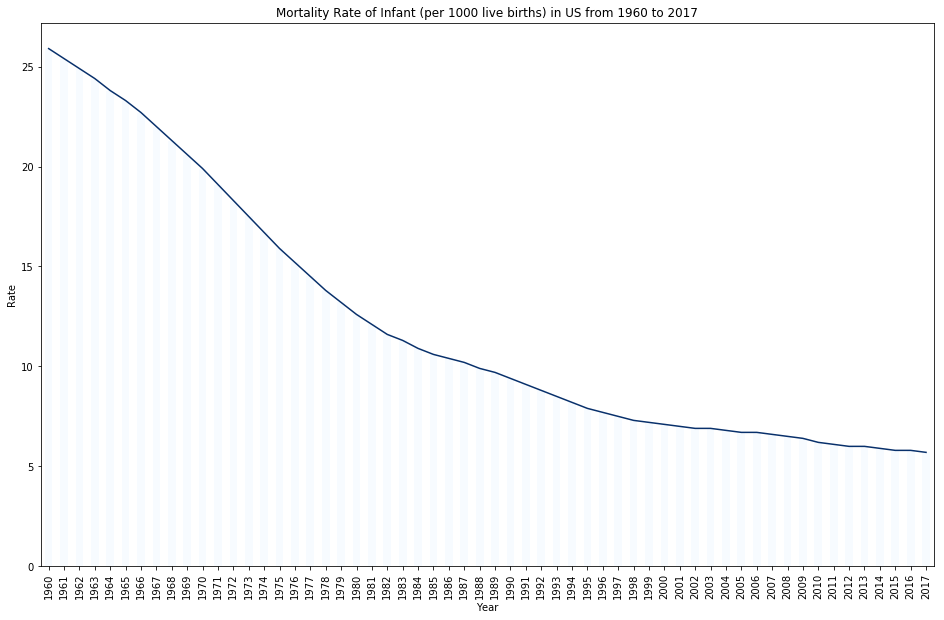

In [0]:
US_MR = tctry_MR.xs('United States')
US_MR_plot = US_MR.plot(kind = 'line',colormap='Blues_r',figsize = (16,10),
title = 'Mortality Rate of Infant (per 1000 live births) in US from 1960 to 2017')
US_MR_plot.set_xlabel("Year")
US_MR_plot.set_ylabel("Rate")
US_MR_plot2 = US_MR.plot(kind = 'bar',colormap='Blues')

We can know from three graphs above that there is a trend for each country: as year goes by, the mortality rate of infant decreases. 

### 2.3 Dealing with missing values

Since this dataset is a time series data, we can handle missing data of China by using linear interpolation. 

In [0]:
tctry_MR.loc['China'].fillna(method = 'bfill',inplace = True) # Next observation carried backward

In [0]:
tctry_MR

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,...,15.8,14.6,13.6,12.6,11.6,10.8,10.0,9.2,8.5,7.9
India,161.4,159.1,156.9,154.9,153.1,151.3,149.6,148.0,146.4,144.7,...,49.4,47.3,45.1,43.0,40.9,38.9,36.9,35.0,33.2,31.5
United States,25.9,25.4,24.9,24.4,23.8,23.3,22.7,22.0,21.3,20.6,...,6.5,6.4,6.2,6.1,6.0,6.0,5.9,5.8,5.8,5.7


In [0]:
NewCN_MR = tctry_MR.loc['China']

In [0]:
print(NewCN_MR)

1960    83.7
1961    83.7
1962    83.7
1963    83.7
1964    83.7
1965    83.7
1966    83.7
1967    83.7
1968    83.7
1969    83.7
1970    80.0
1971    76.4
1972    72.9
1973    69.4
1974    65.9
1975    62.4
1976    59.0
1977    55.7
1978    52.8
1979    50.3
1980    48.0
1981    46.2
1982    44.7
1983    43.5
1984    42.7
1985    42.3
1986    42.1
1987    42.1
1988    42.2
1989    42.2
1990    42.1
1991    41.7
1992    41.0
1993    40.1
1994    38.9
1995    37.7
1996    36.3
1997    34.9
1998    33.5
1999    31.9
2000    30.1
2001    28.2
2002    26.2
2003    24.1
2004    22.2
2005    20.3
2006    18.7
2007    17.2
2008    15.8
2009    14.6
2010    13.6
2011    12.6
2012    11.6
2013    10.8
2014    10.0
2015     9.2
2016     8.5
2017     7.9
Name: China, dtype: float64


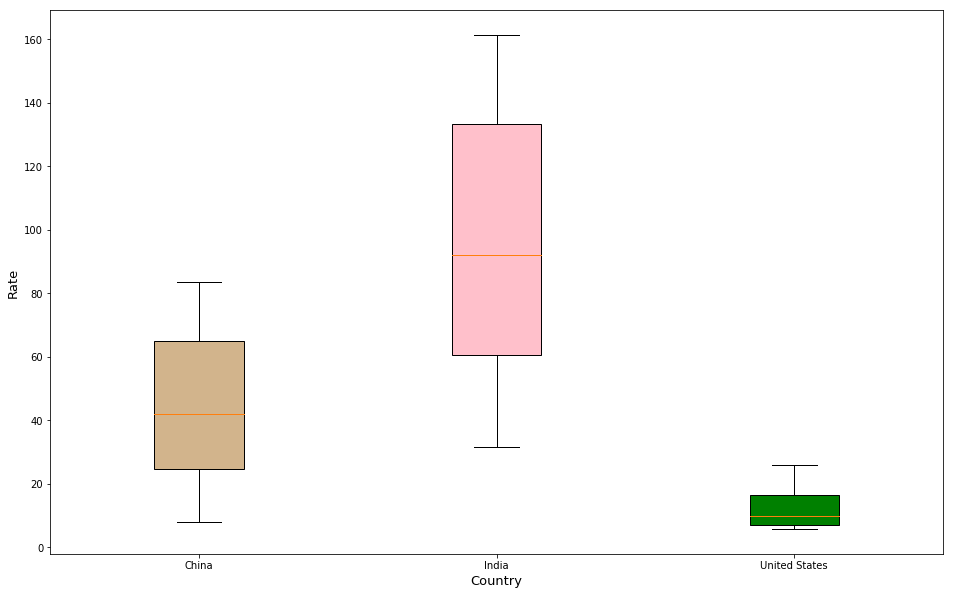

In [0]:
fig = plt.figure(figsize = (16,10))
ax  = fig.add_subplot(111) 
ax.set_xlabel('Country',fontsize = 13)
ax.set_ylabel('Rate',fontsize = 13)
new_boxplot = ax.boxplot(tctry_MR,patch_artist = True, labels = ('China','India','United States'))
colors = ['tan', 'pink', 'green']

for patch, color in zip(new_boxplot['boxes'], colors):
    patch.set_facecolor(color)

Text(0.5,1,'Mortality Rate of Infant (per 1000 live births) in China, India and USA from 1960 to 2017')

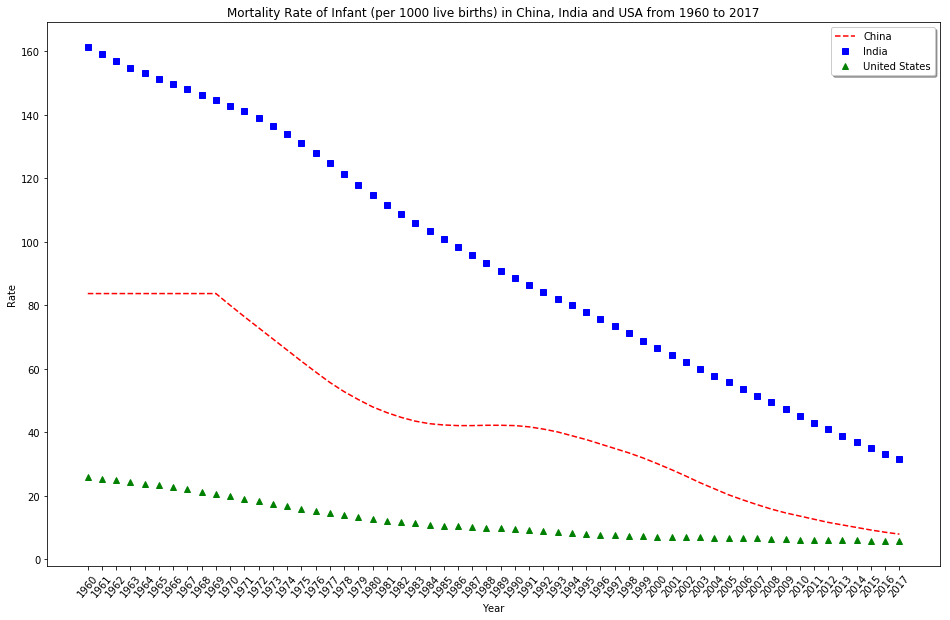

In [0]:
plt.figure(figsize=(16,10)) 
plt.plot(NewCN_MR.index,NewCN_MR.values, 'r--', NewCN_MR.index, IND_MR.values, 'bs',
        NewCN_MR.index, US_MR.values, 'g^')
plt.legend(('China', 'India', 'United States'),loc='upper right', shadow=True)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Mortality Rate of Infant (per 1000 live births) in China, India and USA from 1960 to 2017')

## 3. Relationship between birthrate and healthcare (contraceptive prevalence and mortality rate)

### 3.1 Load birthrate dataset

In [0]:
BR = pd.read_csv('birthrate.csv', sep = ',',header = 0)

In [0]:
BR.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,35.679,34.529,33.320,32.050,30.737,29.413,...,11.214,11.123,11.090,11.111,11.179,11.281,11.404,11.532,NaN,NaN
1,Afghanistan,AFG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,51.279,51.373,51.457,51.530,51.589,51.631,...,39.829,38.750,37.690,36.670,35.706,34.809,33.981,33.211,NaN,NaN
2,Angola,AGO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,49.080,48.779,48.547,48.430,48.450,48.622,...,45.656,45.102,44.493,43.847,43.182,42.520,41.882,41.281,NaN,NaN
3,Albania,ALB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,40.924,40.368,39.627,38.723,37.695,36.599,...,12.001,12.100,12.197,12.257,12.259,12.197,12.080,11.934,NaN,NaN
4,Andorra,AND,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.800,NaN,9.500,NaN,NaN,NaN,8.800,NaN,NaN,NaN


In [0]:
BR.set_index('Country Name',inplace = True)

In [0]:
tctry_BR = BR.drop(['Country Code','Indicator Name','Indicator Code','2018','2019'], axis = 1).loc[['China','India','United States']]

In [0]:
tctry_BR

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,20.860,18.020,37.010,43.37,39.140,37.880,35.050,33.960,35.590,34.110,...,12.14,12.130,11.900,11.930,12.100,12.080,12.370,12.070,12.950,12.430
India,41.995,41.749,41.484,41.20,40.898,40.587,40.274,39.968,39.672,39.388,...,22.39,21.755,21.114,20.495,19.923,19.416,18.984,18.625,18.332,18.083
United States,23.700,23.300,22.400,21.70,21.100,19.400,18.400,17.800,17.600,17.900,...,14.00,13.500,13.000,12.700,12.600,12.400,12.500,12.400,12.200,11.800


In [0]:
print(tctry_BR.isnull().sum(axis = 1))

Country Name
China            0
India            0
United States    0
dtype: int64


For each country, there is no missing values

In [0]:
tctry_BR.apply(pd.DataFrame.describe,axis = 1)

,count,mean,std,min,25%,50%,75%,max
Country Name,,,,,,,,
China,58.0,20.537241,8.408260,11.900,12.88250,18.2600,22.8650,43.370
India,58.0,31.324362,7.458052,18.083,25.14775,32.4235,37.7815,41.995
United States,58.0,15.662069,2.663715,11.800,14.12500,15.0500,16.1500,23.700


### 3.2 Merge three datasets

In [0]:
tctry_CP

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,69.5,69.5,69.5,69.5,69.5,69.5,69.50,69.50,69.50,69.50,...,89.3,89.0000,89.100,88.6000,87.90,87.2200,86.54000,85.8600,85.180000,84.500000
India,13.6,13.6,13.6,13.6,13.6,13.6,13.60,13.60,13.60,13.60,...,54.8,54.6375,54.475,54.3125,54.15,53.9875,53.82500,53.6625,53.500000,53.500000
United States,66.5,66.5,66.5,66.5,66.5,66.5,66.72,66.94,67.16,67.38,...,76.4,76.4000,76.400,75.2500,74.10,74.1000,72.70028,72.7000,75.937181,75.937181


In [0]:
tctry_MR

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,83.7,...,15.8,14.6,13.6,12.6,11.6,10.8,10.0,9.2,8.5,7.9
India,161.4,159.1,156.9,154.9,153.1,151.3,149.6,148.0,146.4,144.7,...,49.4,47.3,45.1,43.0,40.9,38.9,36.9,35.0,33.2,31.5
United States,25.9,25.4,24.9,24.4,23.8,23.3,22.7,22.0,21.3,20.6,...,6.5,6.4,6.2,6.1,6.0,6.0,5.9,5.8,5.8,5.7


In [0]:
tctry_BR

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
China,20.860,18.020,37.010,43.37,39.140,37.880,35.050,33.960,35.590,34.110,...,12.14,12.130,11.900,11.930,12.100,12.080,12.370,12.070,12.950,12.430
India,41.995,41.749,41.484,41.20,40.898,40.587,40.274,39.968,39.672,39.388,...,22.39,21.755,21.114,20.495,19.923,19.416,18.984,18.625,18.332,18.083
United States,23.700,23.300,22.400,21.70,21.100,19.400,18.400,17.800,17.600,17.900,...,14.00,13.500,13.000,12.700,12.600,12.400,12.500,12.400,12.200,11.800


In [0]:
BrHealth_data = pd.DataFrame()

In [0]:
BrHealth_data['Year'] = tctry_BR.iloc[0].index

In [0]:
BrHealth_data['CN_BR'] = tctry_BR.loc['China'].values.round(2)

In [0]:
BrHealth_data['CN_CP'] = tctry_CP.loc['China'].values.round(2)

In [0]:
BrHealth_data['CN_MR'] = tctry_MR.loc['China'].values.round(2)

In [0]:
BrHealth_data['IND_BR'] = tctry_BR.loc['India'].values.round(2)

In [0]:
BrHealth_data['IND_CP'] = tctry_CP.loc['India'].values.round(2)

In [0]:
BrHealth_data['IND_MR'] = tctry_MR.loc['India'].values.round(2)

In [0]:
BrHealth_data['US_BR'] = tctry_BR.loc['United States'].values.round(2)

In [0]:
BrHealth_data['US_CP'] = tctry_CP.loc['United States'].values.round(2)

In [0]:
BrHealth_data['US_MR'] = tctry_MR.loc['United States'].values.round(2)

In [0]:
BrHealth_data.head()

,Year,CN_BR,CN_CP,CN_MR,IND_BR,IND_CP,IND_MR,US_BR,US_CP,US_MR
0,1960,20.86,69.5,83.7,42.00,13.6,161.4,23.7,66.5,25.9
1,1961,18.02,69.5,83.7,41.75,13.6,159.1,23.3,66.5,25.4
2,1962,37.01,69.5,83.7,41.48,13.6,156.9,22.4,66.5,24.9
3,1963,43.37,69.5,83.7,41.20,13.6,154.9,21.7,66.5,24.4
4,1964,39.14,69.5,83.7,40.90,13.6,153.1,21.1,66.5,23.8


In [0]:
#BrHealth_data.to_csv('Br_health.csv')

### 3.3 Correlation between birth rate and healthcare (two features) for each country

#### 3.3.1 China

In [0]:
# correlation between birth rate and contraceptive prevalence
CN_BrcorrCp, _ = pearsonr(BrHealth_data['CN_BR'], BrHealth_data['CN_CP'])
print('Pearsons correlation: %.3f' % CN_BrcorrCp)

Pearsons correlation: -0.744


The correlation is -0.744, which means that the birth rate of China has negative correlation with contraceptive prevalence

In [0]:
# correlation between birth rate and mortality rate
CN_BrcorrMr, _ = pearsonr(BrHealth_data['CN_BR'], BrHealth_data['CN_MR'])
print('Pearsons correlation: %.3f' % CN_BrcorrMr)

Pearsons correlation: 0.894


The correlation is 0.894, which means that the birth rate of China has positive correlation with mortality rate of infant

#### 3.3.2 India

In [0]:
# correlation between birth rate and contraceptive prevalence
IND_BrcorrCp, _ = pearsonr(BrHealth_data['IND_BR'], BrHealth_data['IND_CP'])
print('Pearsons correlation: %.3f' % IND_BrcorrCp)

Pearsons correlation: -0.927


The correlation is -0.927, which means that the birth rate of India has highly negative correlation with contraceptive prevalence

In [0]:
# correlation between birth rate and mortality rate
IND_BrcorrMr, _ = pearsonr(BrHealth_data['IND_BR'], BrHealth_data['IND_MR'])
print('Pearsons correlation: %.3f' % IND_BrcorrMr)

Pearsons correlation: 0.988


The correlation is 0.988, which means that the birth rate of India has positive correlation with mortality rate of infant

#### 3.3.3 United States

In [0]:
# correlation between birth rate and contraceptive prevalence
US_BrcorrCp, _ = pearsonr(BrHealth_data['US_BR'], BrHealth_data['US_CP'])
print('Pearsons correlation: %.3f' % US_BrcorrCp)

Pearsons correlation: -0.751


The correlation is -0.751, which means that the birth rate of United States has negative correlation with contraceptive prevalence

In [0]:
# correlation between birth rate and mortality rate
US_BrcorrMr, _ = pearsonr(BrHealth_data['US_BR'], BrHealth_data['US_MR'])
print('Pearsons correlation: %.3f' % US_BrcorrMr)

Pearsons correlation: 0.878


The correlation is 0.878, which means that the birth rate of United States has positive correlation with mortality rate of infant

For each country, the birth rate is negative correlated to contraceptive prevalence. As the contraceptive methods are more prevalent, the birth rate is decreasing. Also, the birth rate is highly positive correlated to mortaility rate of infant. As mortality rate goes down, the birth rate decreases as well. Since low mortality rate of infant means healthcare improves, we can conclude that as healthcare developes, people tend to have less children.

### 3.4 linear regression